import labraries and datasets


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
creditcard_df = pd.read_csv('G:\ML project\Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
creditcard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
creditcard_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

<AxesSubplot:>

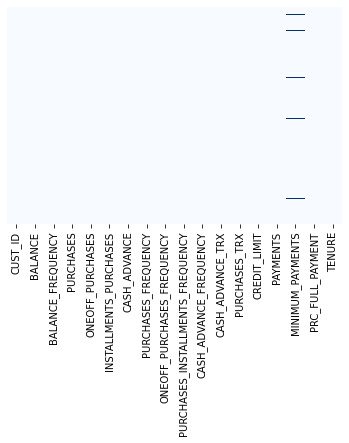

In [12]:
#  find missing data 
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")



In [13]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [16]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [17]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
len(creditcard_df.columns)

17

C:\Users\samir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

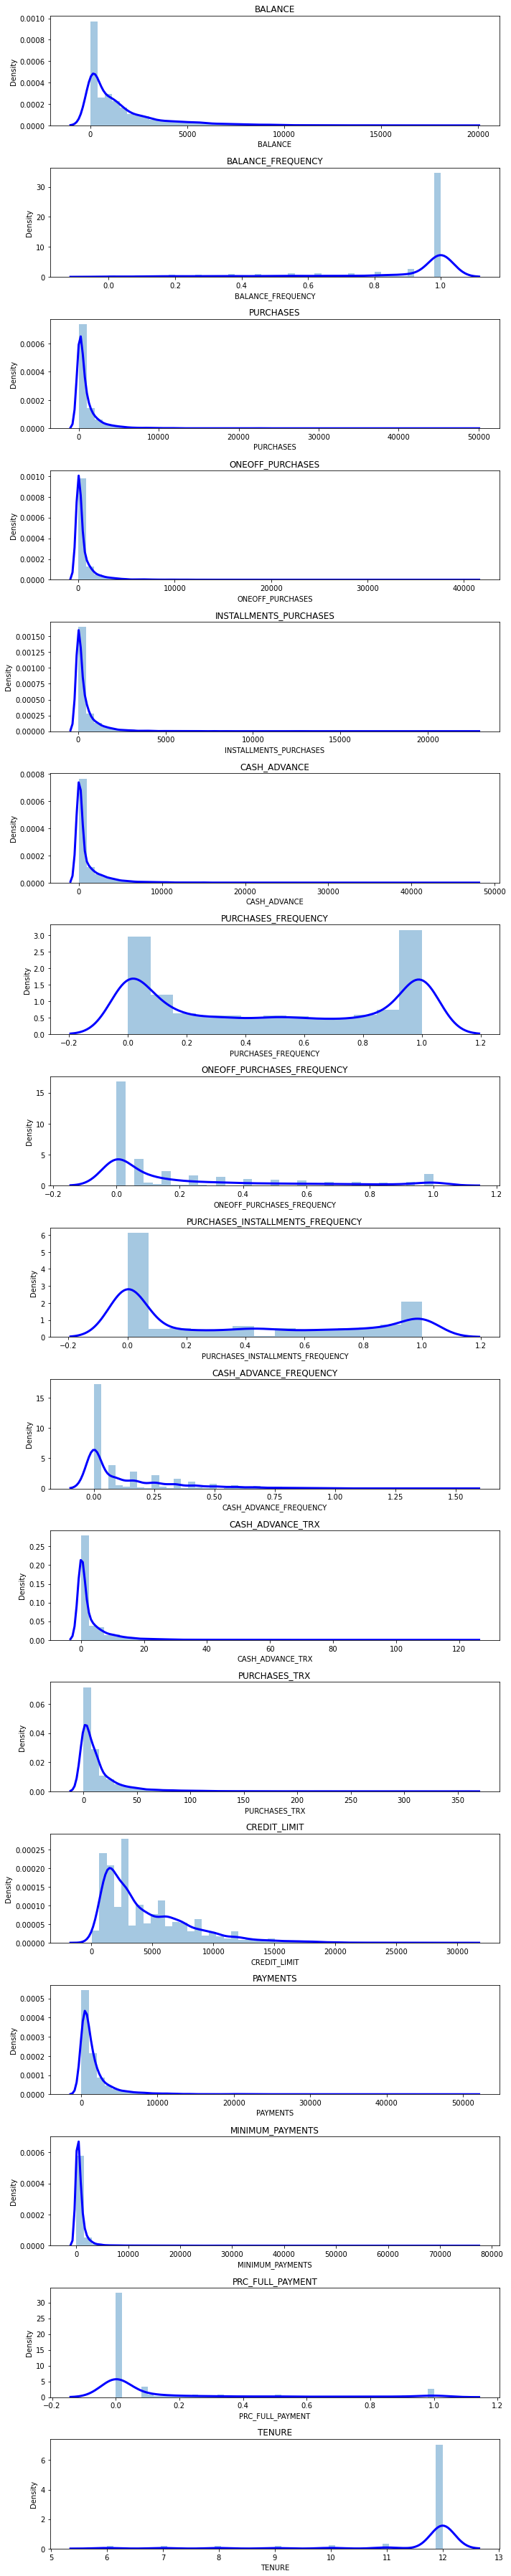

In [20]:


plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [21]:
correlations = creditcard_df.corr()


<AxesSubplot:>

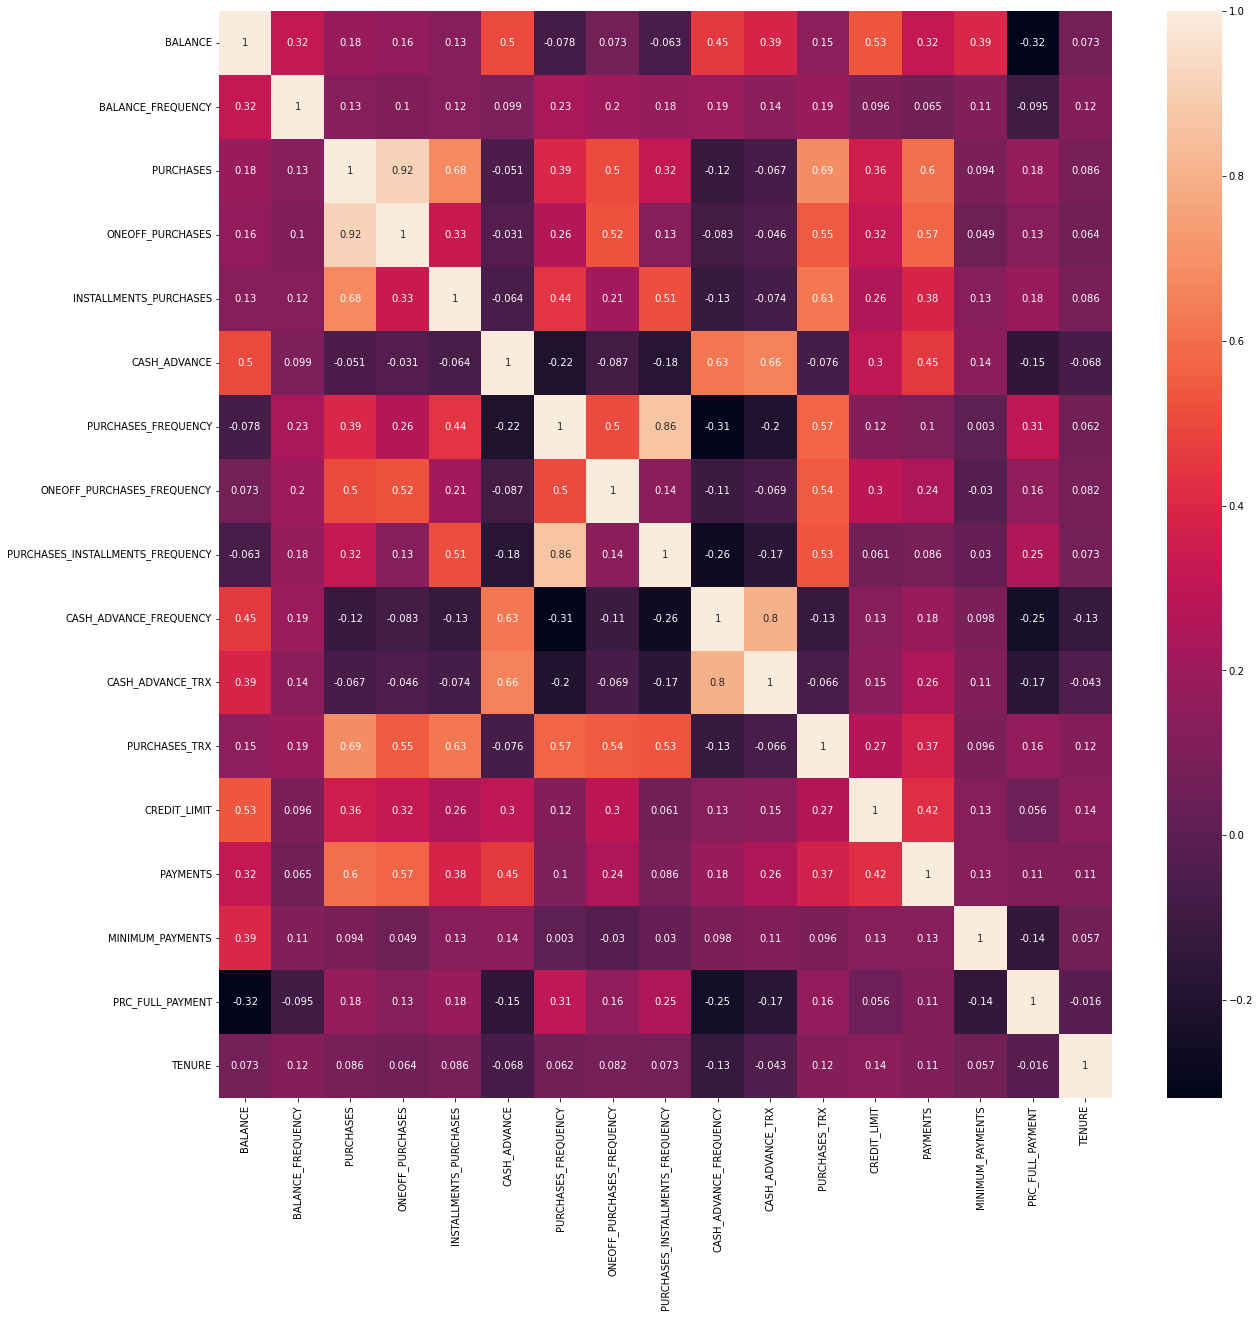

In [22]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [23]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [24]:
creditcard_df_scaled.shape

(8950, 17)

In [25]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

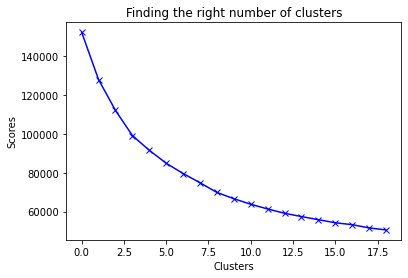

In [26]:
# find best number of clusters the optimal k
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [27]:
# apply the K_mean
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [28]:
kmeans.cluster_centers_.shape

(8, 17)

In [29]:
labels.shape

(8950,)

In [30]:
labels.max()

7

In [31]:
labels.min()

0

In [32]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 6, 4, ..., 2, 2, 2])

In [33]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


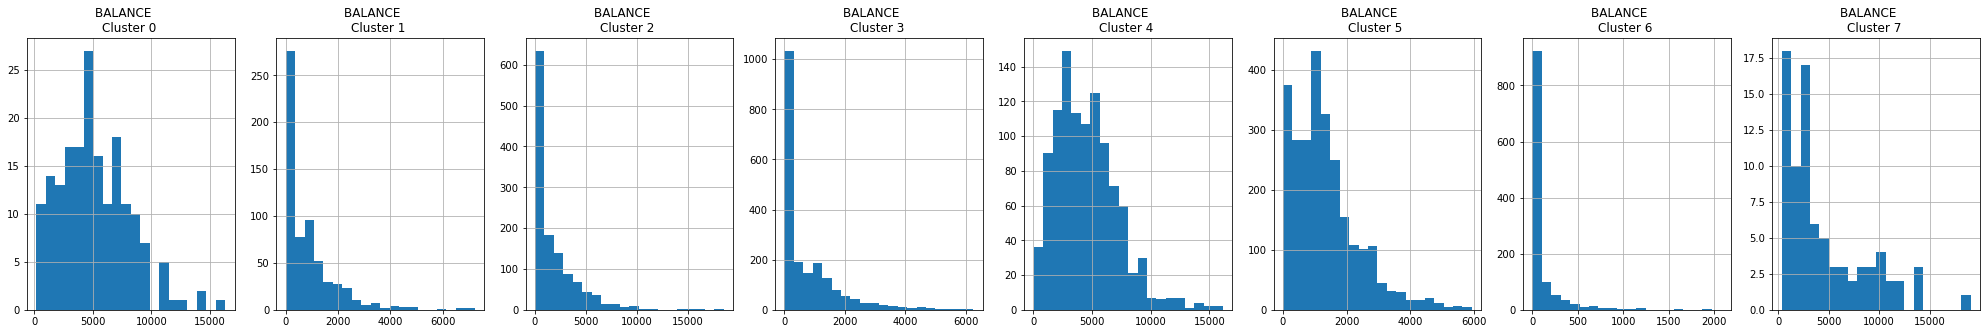

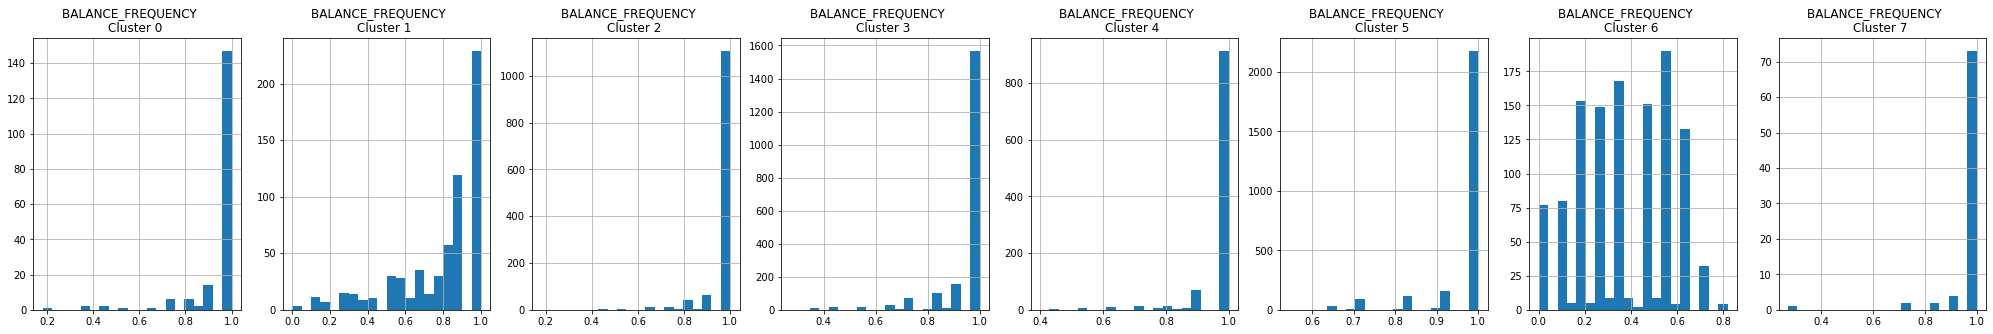

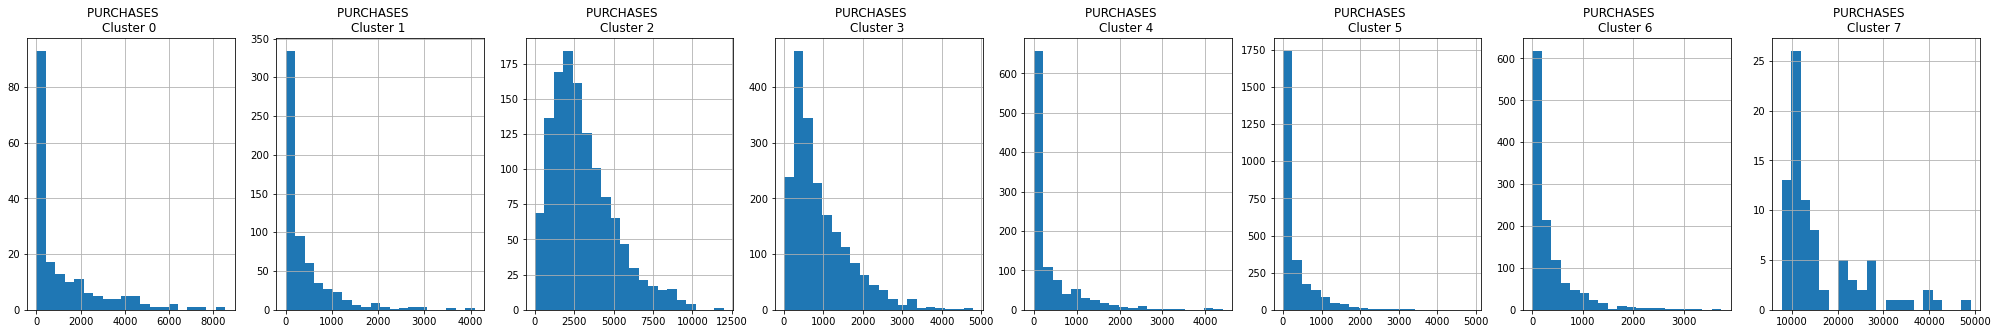

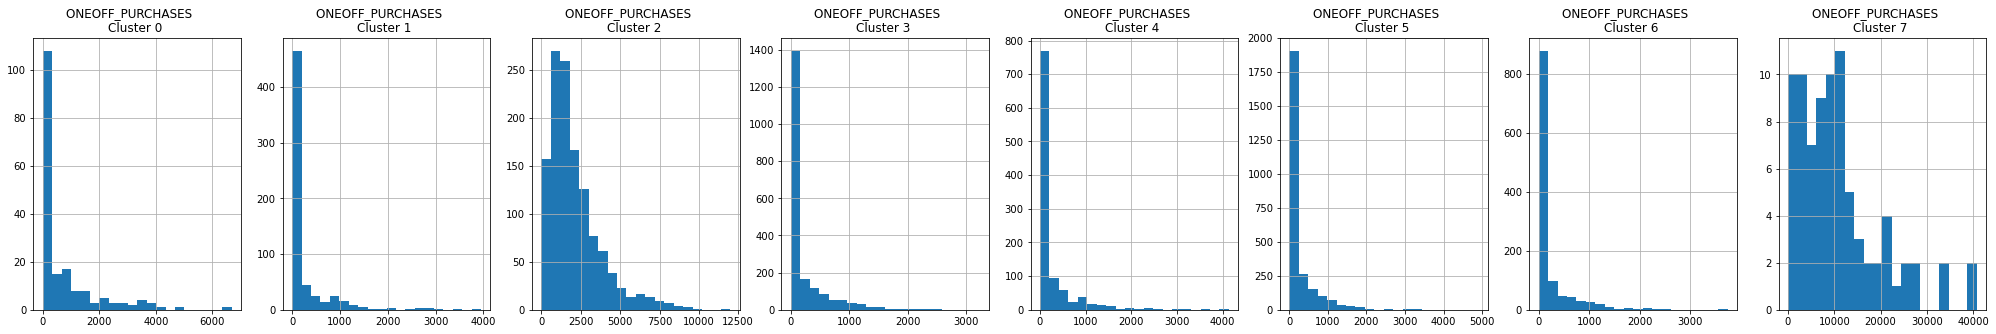

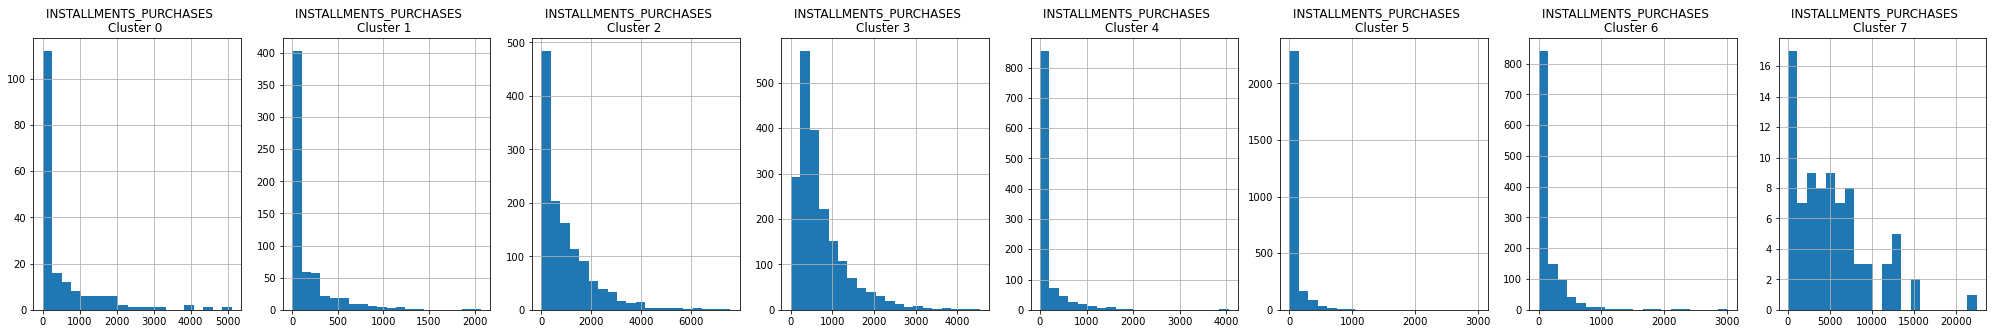

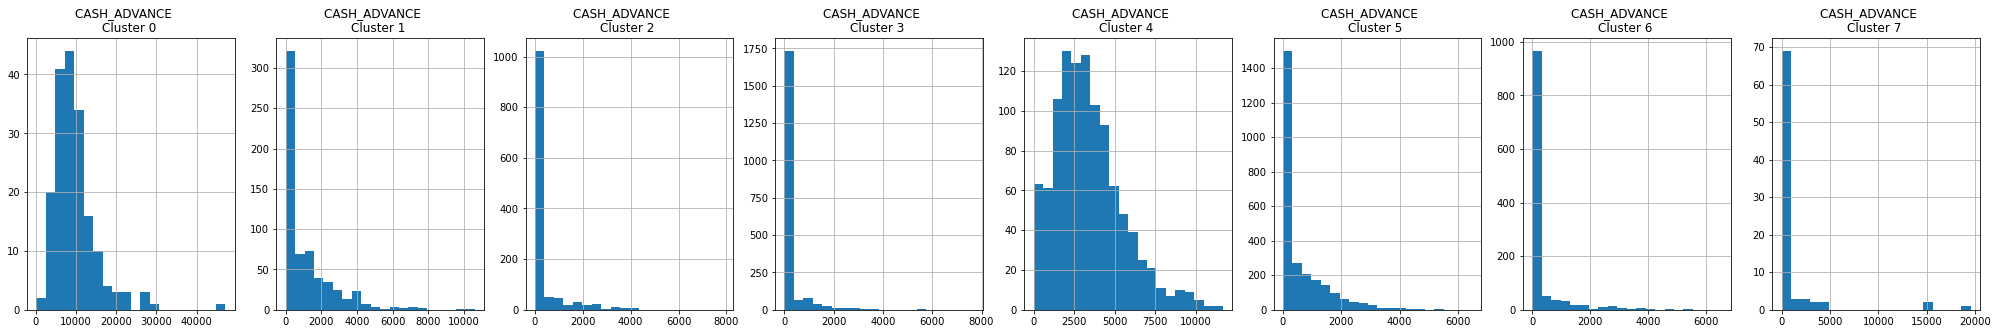

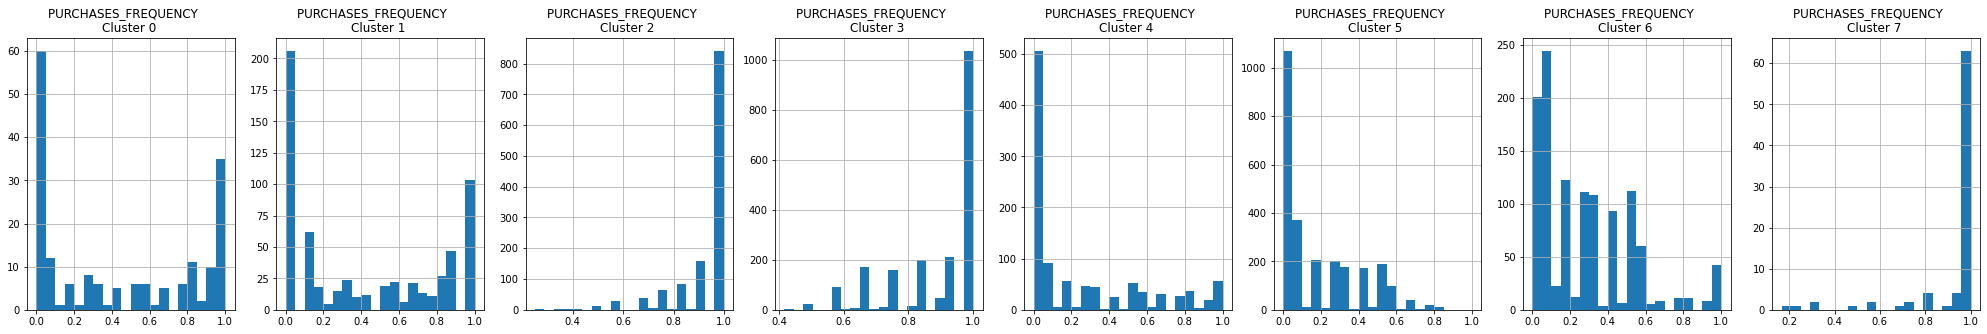

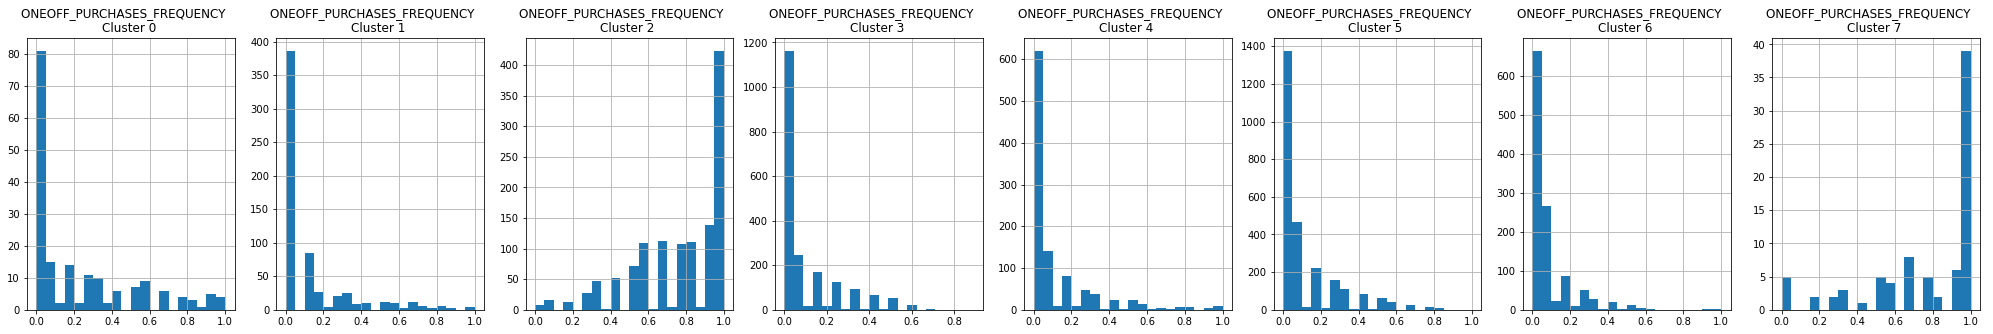

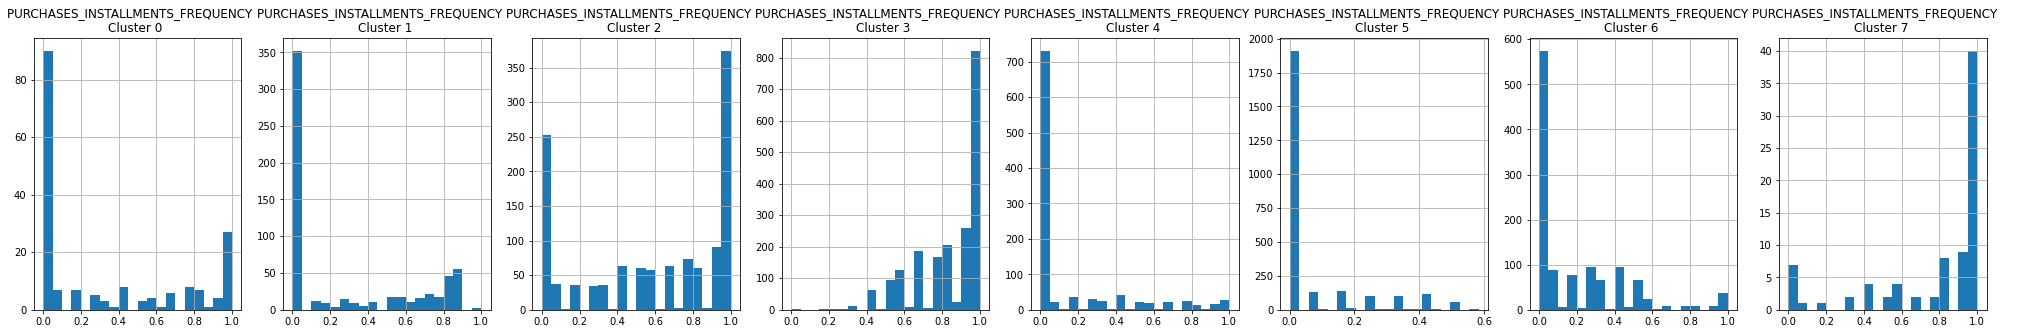

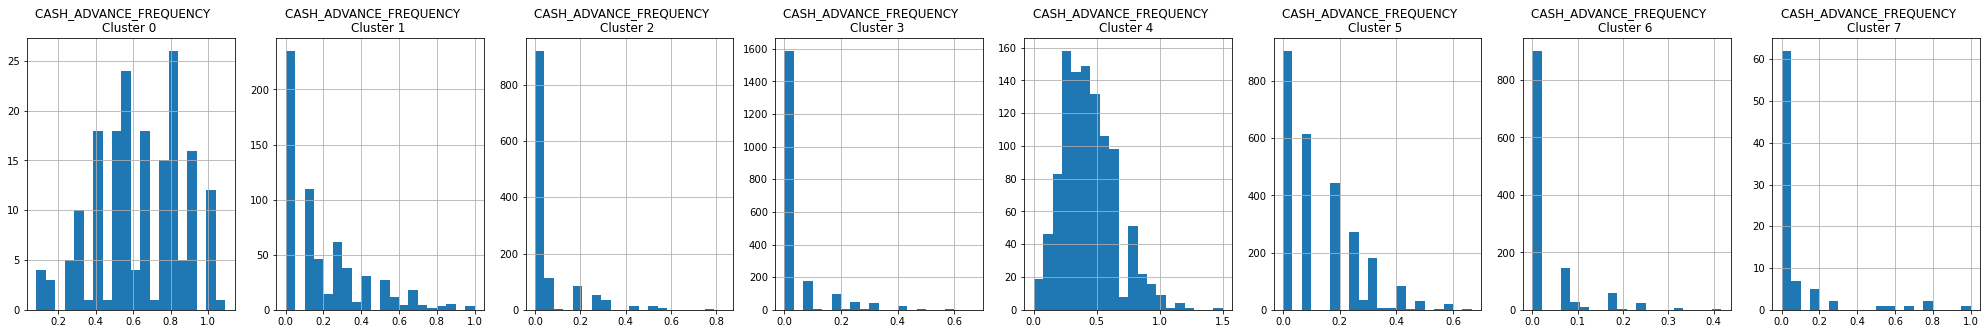

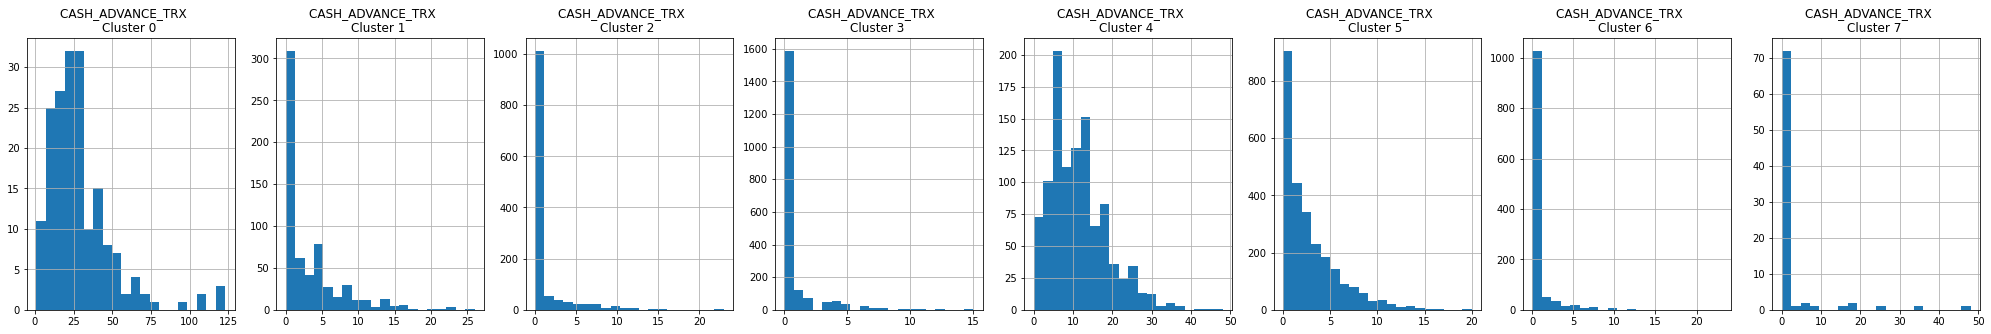

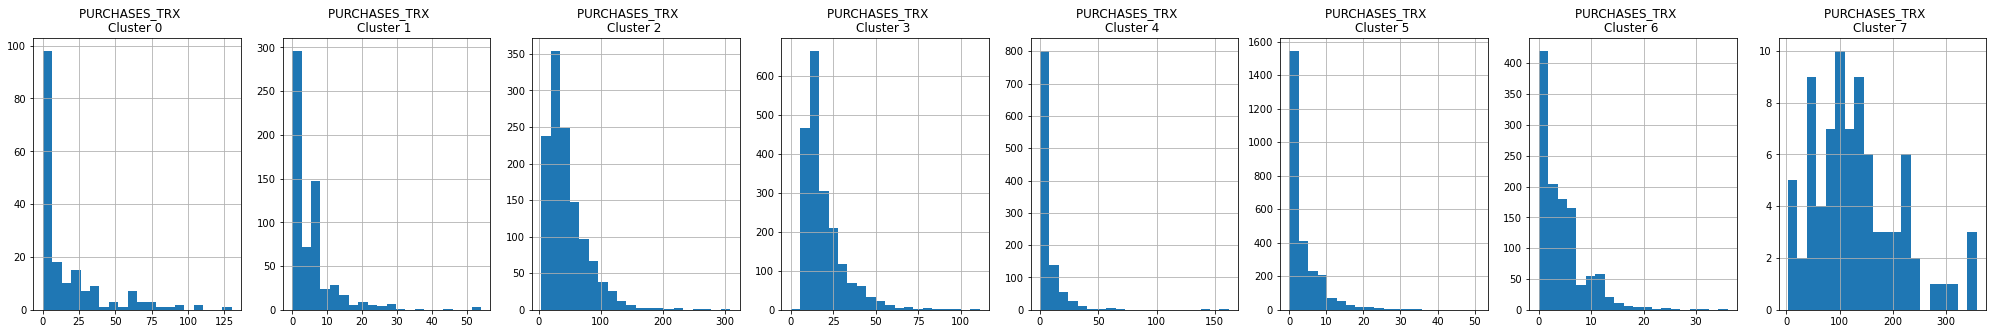

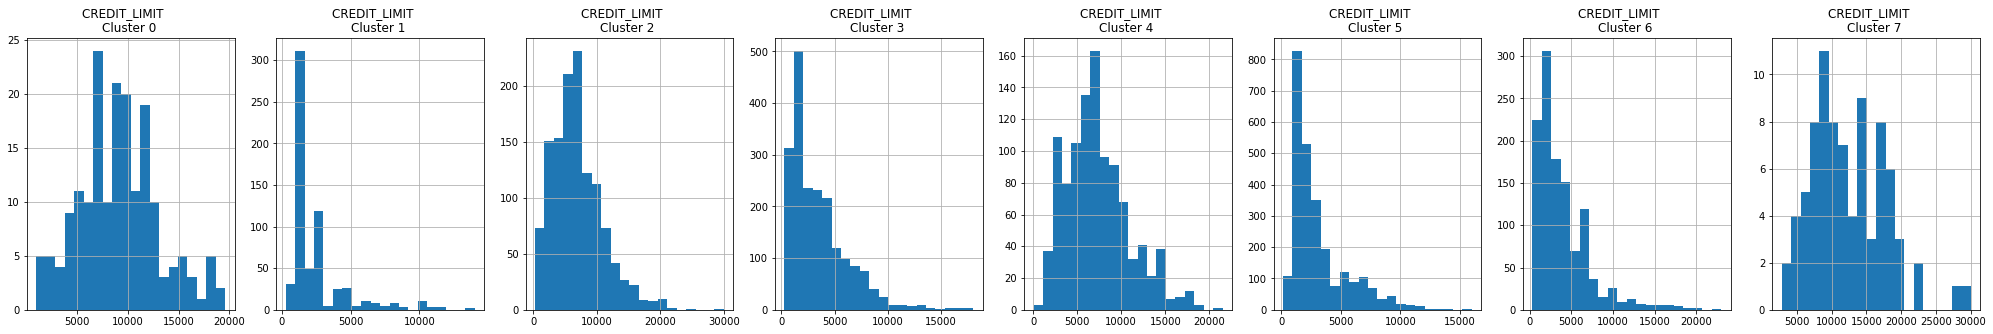

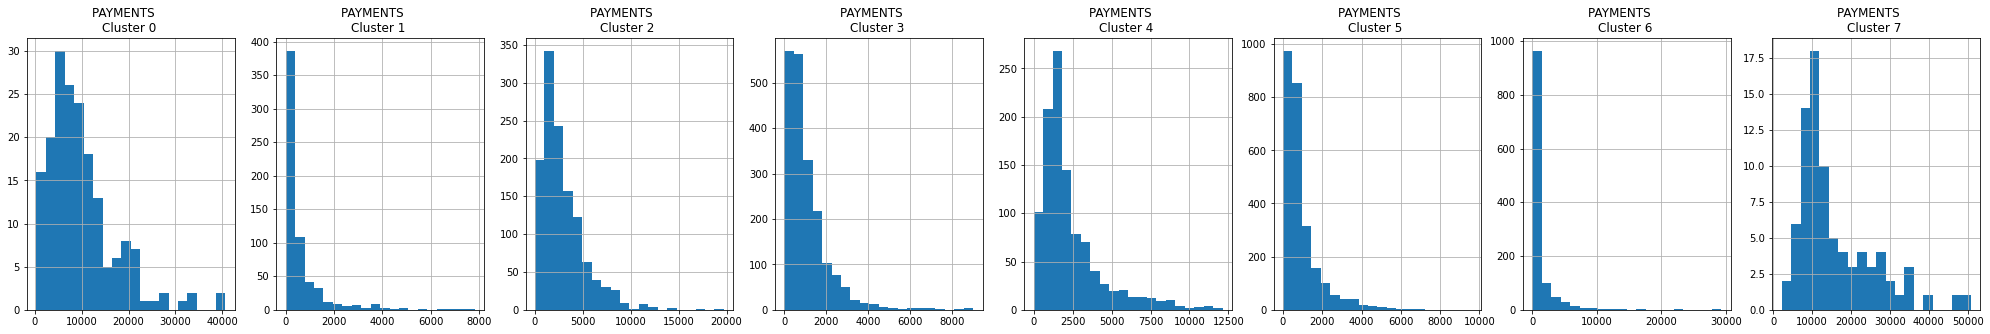

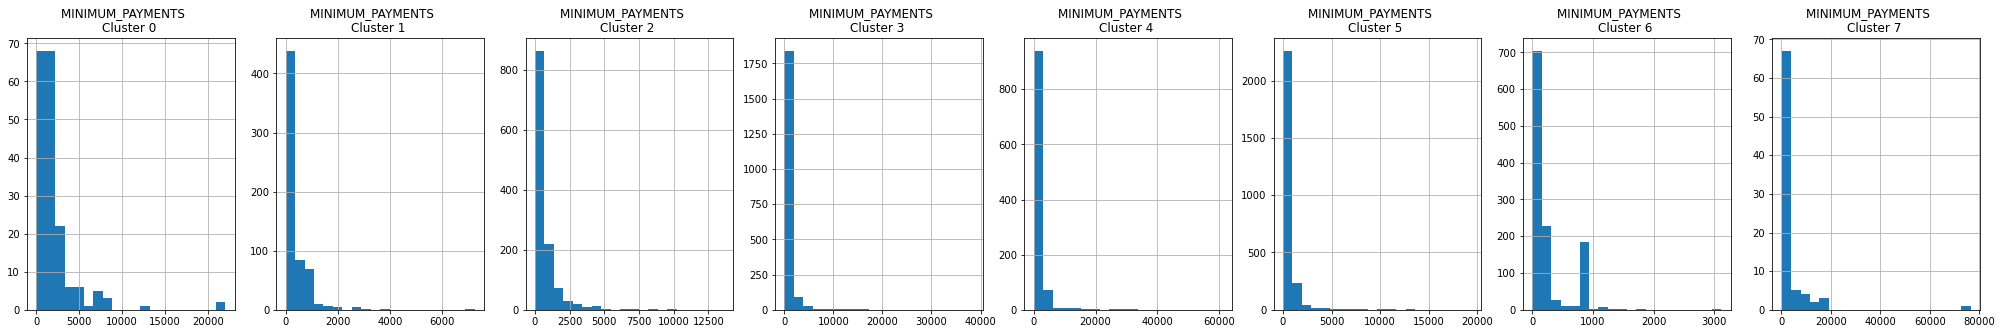

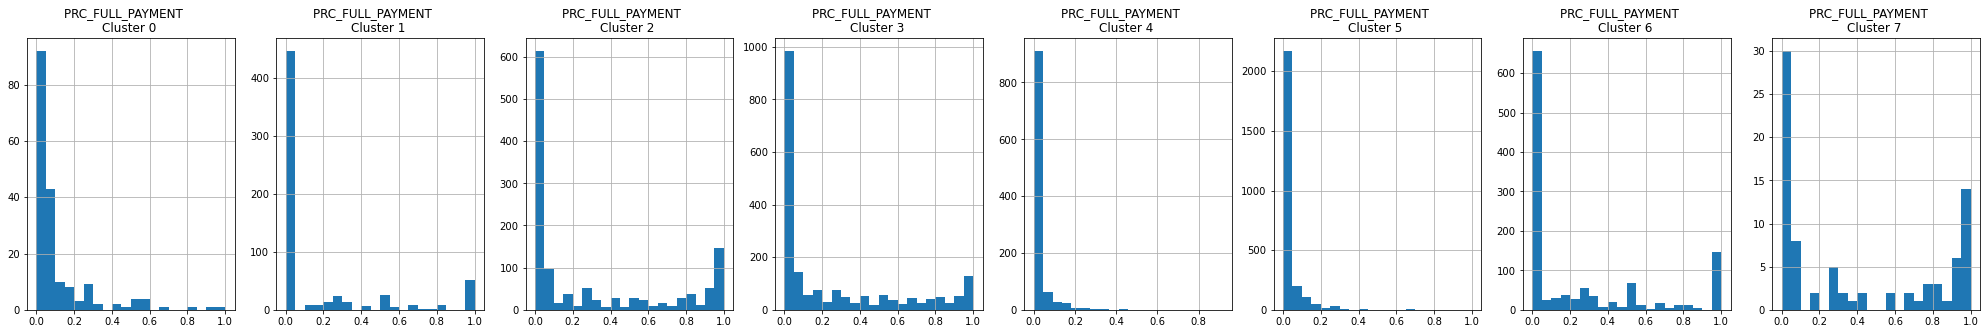

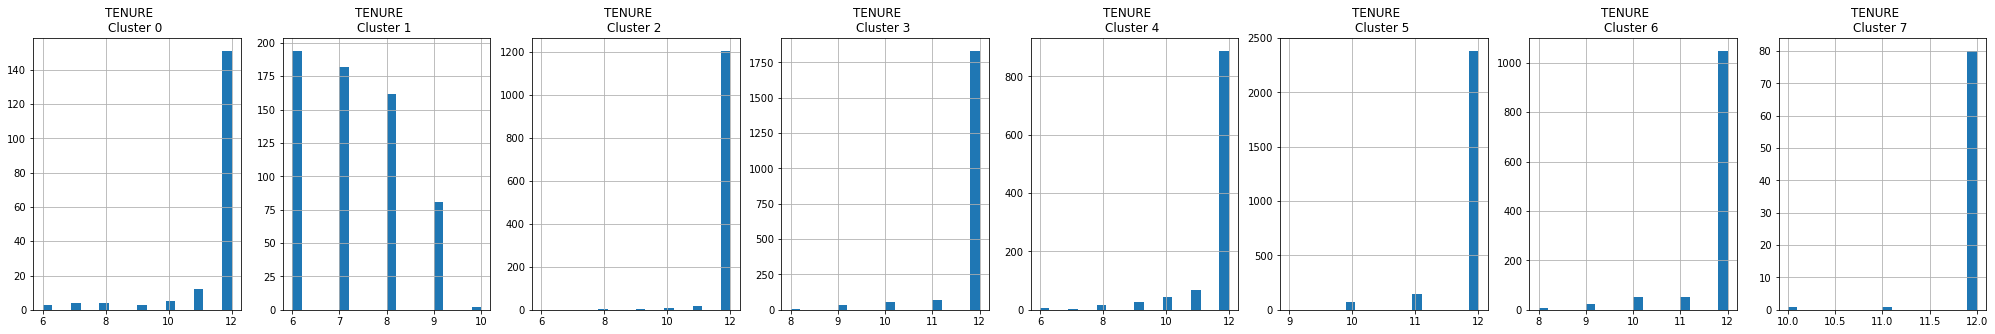

In [34]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


In [35]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222073, -1.07644966],
       [-1.1382958 ,  2.50645806],
       [ 0.96968757, -0.38346465],
       ...,
       [-0.92620475, -1.8107865 ],
       [-2.33655221, -0.65796952],
       [-0.55641952, -0.40045246]])

In [36]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076450
1,-1.138296,2.506458
2,0.969688,-0.383465
3,-0.873628,0.043163
4,-1.599435,-0.688579


In [37]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076450,5
1,-1.138296,2.506458,4
2,0.969688,-0.383465,2
3,-0.873628,0.043163,5
4,-1.599435,-0.688579,5


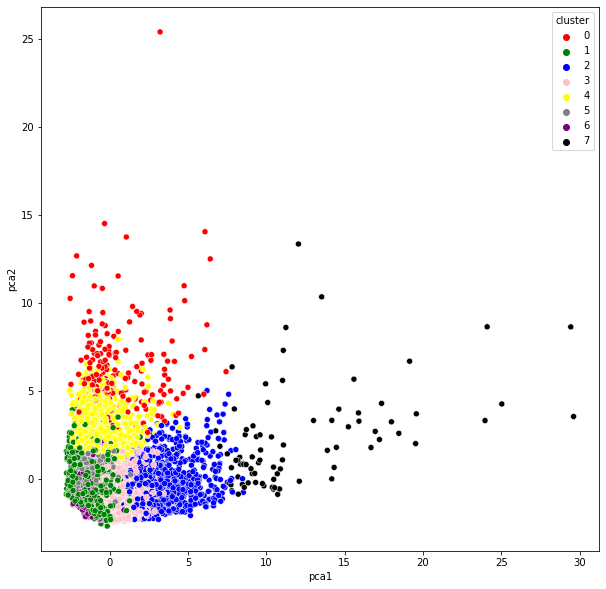

In [38]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

Predicate the future stock market using svm

In [39]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [40]:
path = 'stocks _data'
all_files=glob.glob(path+"/*.csv")

In [41]:
all_files

['stocks _data\\A.csv',
 'stocks _data\\AAALY.csv',
 'stocks _data\\AAC.csv',
 'stocks _data\\AACAY.csv',
 'stocks _data\\AAL.csv',
 'stocks _data\\AAME.csv',
 'stocks _data\\AAOI.csv',
 'stocks _data\\AAON.csv',
 'stocks _data\\AAP.csv',
 'stocks _data\\AAPL.csv',
 'stocks _data\\AAT.csv',
 'stocks _data\\AAVL.csv',
 'stocks _data\\AAWW.csv',
 'stocks _data\\AB.csv',
 'stocks _data\\ABBV.csv',
 'stocks _data\\ABC.csv',
 'stocks _data\\ABCB.csv',
 'stocks _data\\ABCD.csv',
 'stocks _data\\ABCO.csv',
 'stocks _data\\ABG.csv',
 'stocks _data\\ABGOY.csv',
 'stocks _data\\ABIO.csv',
 'stocks _data\\ABLT.csv',
 'stocks _data\\ABM.csv',
 'stocks _data\\ABMD.csv',
 'stocks _data\\ABR.csv',
 'stocks _data\\ABT.csv',
 'stocks _data\\ABTZY.csv',
 'stocks _data\\ACAD.csv',
 'stocks _data\\ACC.csv',
 'stocks _data\\ACCYY.csv',
 'stocks _data\\ACDVF.csv',
 'stocks _data\\ACET.csv',
 'stocks _data\\ACFC.csv',
 'stocks _data\\ACFL.csv',
 'stocks _data\\ACFN.csv',
 'stocks _data\\ACG.csv',
 'stocks _d

In [42]:
li_mapper = map(lambda filename:pd.read_csv(filename,index_col=None, header=0),all_files);


In [44]:
li = list(li_mapper)

In [45]:
# data contain all the stock market in the world company symbol

Stock_data =pd.concat(li,axis=0,ignore_index=True)
Stock_data

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,14-04-2011,20.799999,21.000000,63774200.0,22.000000,21.200001,18.751789
1,15-04-2011,20.809999,21.219999,5891700.0,21.840000,21.360001,18.893307
2,18-04-2011,21.110001,21.299999,5759100.0,22.950001,22.900000,20.255466
3,19-04-2011,22.780001,23.170000,11062300.0,24.959999,24.730000,21.874142
4,20-04-2011,23.799999,25.799999,5863400.0,25.950001,24.040001,21.263823
...,...,...,...,...,...,...,...
17856275,14-12-2021,41.480000,41.939999,79000.0,41.959999,41.639999,41.639999
17856276,15-12-2021,41.790001,41.889999,66300.0,42.220001,42.130001,42.130001
17856277,16-12-2021,42.320000,42.490002,40900.0,42.650002,42.450001,42.450001
17856278,17-12-2021,42.279999,42.619999,80000.0,42.619999,42.320000,42.320000


In [46]:
Stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17856280 entries, 0 to 17856279
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   Low             float64
 2   Open            float64
 3   Volume          float64
 4   High            float64
 5   Close           float64
 6   Adjusted Close  float64
dtypes: float64(6), object(1)
memory usage: 953.6+ MB


In [47]:
import pandas as pd
# Read stock prices data
stock_price_df = pd.read_csv('1.1 stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [48]:

stock_vol_df = pd.read_csv('stock_volume.csv')
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [49]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [50]:
# Sort the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [51]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [52]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [53]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [54]:
# Get stock volume dataframe info
stock_vol_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [55]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [56]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [57]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [58]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [59]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [60]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [61]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
# using dropna() function  
Stock_data.dropna()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,14-04-2011,20.799999,21.000000,63774200.0,22.000000,21.200001,18.751789
1,15-04-2011,20.809999,21.219999,5891700.0,21.840000,21.360001,18.893307
2,18-04-2011,21.110001,21.299999,5759100.0,22.950001,22.900000,20.255466
3,19-04-2011,22.780001,23.170000,11062300.0,24.959999,24.730000,21.874142
4,20-04-2011,23.799999,25.799999,5863400.0,25.950001,24.040001,21.263823
...,...,...,...,...,...,...,...
17856275,14-12-2021,41.480000,41.939999,79000.0,41.959999,41.639999,41.639999
17856276,15-12-2021,41.790001,41.889999,66300.0,42.220001,42.130001,42.130001
17856277,16-12-2021,42.320000,42.490002,40900.0,42.650002,42.450001,42.450001
17856278,17-12-2021,42.279999,42.619999,80000.0,42.619999,42.320000,42.320000


In [70]:
split_percentage = 0.8
split = int(split_percentage*len(Stock_data))
  


In [72]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

NameError: name 'X' is not defined

In [68]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
  


NameError: name 'svm' is not defined

In [ ]:
# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
import sys
import time
import numpy as np
import itertools as it
import multiprocessing

from sklearn import svm
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2157, 2), (2157, 1))

In [ ]:
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [ ]:
X_test.shape, y_test.shape

((755, 2), (755, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler().fit(X_train)

In [ ]:
X_train_std= sc.transform(X_train)

In [ ]:
X_test_std= sc.transform(X_test)

In [ ]:
X_test_std

array([[ 2.54779691, -0.90493013],
       [ 2.31317748, -0.61479893],
       [ 2.40146601, -0.90244659],
       ...,
       [13.95955695, -0.81858956],
       [14.58738912, -0.42096224],
       [14.13123047, -0.44377877]])

In [ ]:
X_test

array([[0.26329349, 0.04044577],
       [0.24893705, 0.08062673],
       [0.25433945, 0.04078972],
       ...,
       [0.96158275, 0.05240328],
       [1.        , 0.10747163],
       [0.97208751, 0.10431171]])

In [ ]:
from sklearn.svm import SVR 
svr= SVR(kernel='linear', C=1000)

In [ ]:
svr.fit(X_train_std, y_train)

SVR(C=1000, kernel='linear')

In [ ]:
## predict values using trained model
y_test_pred =svr.predict(X_test_std)
y_train_pred=svr.predict(X_train_std)

In [ ]:
y_test_pred

array([0.16440089, 0.16032164, 0.16234671, 0.16392655, 0.16452871,
       0.16425437, 0.16247263, 0.16229457, 0.16218625, 0.16391464,
       0.16414876, 0.16371993, 0.16374999, 0.16464435, 0.16527509,
       0.16564873, 0.16604676, 0.1666288 , 0.16480305, 0.16513021,
       0.16474345, 0.16287656, 0.16435667, 0.16181177, 0.16257515,
       0.16293975, 0.16247828, 0.162918  , 0.16335727, 0.16009107,
       0.15939665, 0.15804294, 0.1573992 , 0.15929992, 0.16052894,
       0.1601756 , 0.16042284, 0.16065823, 0.16117541, 0.16038996,
       0.16142147, 0.16158044, 0.16195141, 0.16202079, 0.16232256,
       0.16205039, 0.16260196, 0.16383519, 0.1644508 , 0.16418717,
       0.16060245, 0.16176723, 0.16182951, 0.16259087, 0.16200896,
       0.16280923, 0.16454418, 0.16662963, 0.16842624, 0.16732747,
       0.16760412, 0.16913718, 0.17146119, 0.17236046, 0.17317566,
       0.17269435, 0.17223783, 0.17228071, 0.17035314, 0.16882312,
       0.17027806, 0.16982912, 0.17003794, 0.17136361, 0.17237

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,y_test_pred)

0.05846457321584274

In [ ]:
r2_score(y_train,y_train_pred)

0.34745545256134536

In [ ]:
from sklearn import tree


In [ ]:
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
params ={'C':(0.01,0.05,0.1,0.5,1,5,10,50),'gamma':(0.001,0.01,0.1,0.5,0.1)}

In [ ]:
clf_svm_r =svm.SVC(kernel='rbf')

In [ ]:
svm_grid_rad = GridSearchCV(clf_svm_r, params,n_jobs=-1,cv=3,verbose=1,scoring='accuracy')

In [ ]:
svm_grid_rad.best_params_

{'C': 0.01, 'gamma': 0.001}

In [ ]:
radsvm_clf =svm_grid_rad.best_estimator_

In [ ]:
# Calculate Cumulutive returns
Stock_data['Cum_Ret'] = Stock_data['Adjusted Close'].cumsum()
Stock_data

,Low,Open,Volume,High,Close,Adjusted Close,Open-Close,High-Low,Cum_Ret
Date,,,,,,,,,
2011-04-14,20.799999,21.000000,63774200.0,22.000000,21.200001,18.751789,-0.200001,1.200001,1.875179e+01
2011-04-15,20.809999,21.219999,5891700.0,21.840000,21.360001,18.893307,-0.140001,1.030001,3.764510e+01
2011-04-18,21.110001,21.299999,5759100.0,22.950001,22.900000,20.255466,-1.600000,1.840000,5.790056e+01
2011-04-19,22.780001,23.170000,11062300.0,24.959999,24.730000,21.874142,-1.559999,2.179998,7.977470e+01
2011-04-20,23.799999,25.799999,5863400.0,25.950001,24.040001,21.263823,1.759998,2.150002,1.010385e+02
...,...,...,...,...,...,...,...,...,...
2021-12-14,41.480000,41.939999,79000.0,41.959999,41.639999,41.639999,0.299999,0.480000,-5.902460e+31
2021-12-15,41.790001,41.889999,66300.0,42.220001,42.130001,42.130001,-0.240002,0.430000,-5.902460e+31
2021-12-16,42.320000,42.490002,40900.0,42.650002,42.450001,42.450001,0.040001,0.330002,-5.902460e+31


In [ ]:
# Create predictor variables
Stock_data['Open-Close'] = Stock_data.Open - Stock_data.Close
Stock_data['High-Low'] = Stock_data.High - Stock_data.Low
  
# Store all predictor variables in a variable X
X = Stock_data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2011-04-14,-0.200001,1.200001
2011-04-15,-0.140001,1.030001
2011-04-18,-1.600000,1.840000
2011-04-19,-1.559999,2.179998
2011-04-20,1.759998,2.150002


In [ ]:
# Target variables
y = np.where(Stock_data['Close'].shift(-1) > Stock_data['Close'], 1, 0)
y

NameError: name 'np' is not defined